In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about datasets
print("Customers Dataset:")
print(customers.info())
print(customers.describe(include='all'))
print("\nProducts Dataset:")
print(products.info())
print(products.describe(include='all'))
print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.describe(include='all'))


Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName 

In [2]:
# Merge datasets for analysis
data = pd.merge(transactions, customers, on='CustomerID', how='inner')
data = pd.merge(data, products, on='ProductID', how='inner')

# Convert date columns to datetime objects
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data['SignupDate'] = pd.to_datetime(data['SignupDate'])

# Add new derived columns
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month

# Display the first few rows of the merged dataset
print("\nMerged Dataset:")
print(data.head())

# Exploratory Data Analysis (EDA)
def eda_summary(df):
    print("\nGeneral Information:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

eda_summary(data)


Merged Dataset:
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  Year  Month  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  2024      8  
1  

In [3]:
data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Year,Month
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,8
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,5
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,4
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,2024,10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,2024,6
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,2024,4
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,2024,9



Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


<ipython-input-4-536a8f58cfab>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


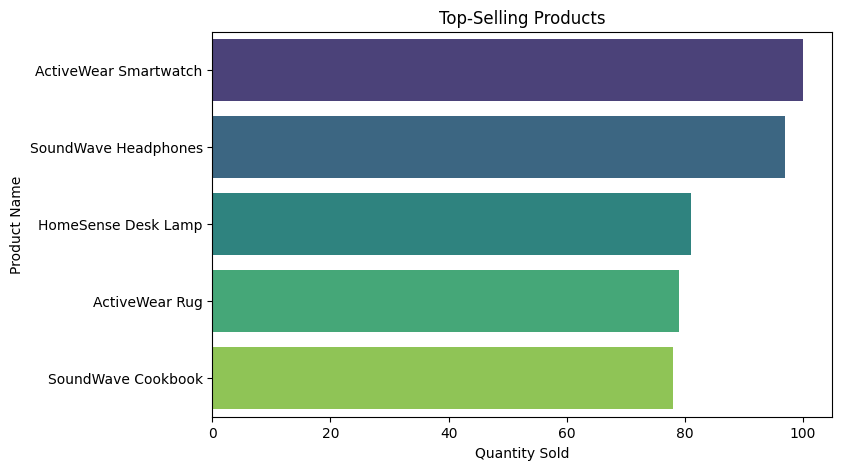

In [4]:
# Business Insights
insights = []

# 1. Top-selling products
top_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
insights.append(f"Top-selling products are: {', '.join(top_products.index)}.")
print("\nTop-Selling Products:")
print(top_products)

# Plotting Top-Selling Products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()



Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-5-3987d6b4971a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='coolwarm')


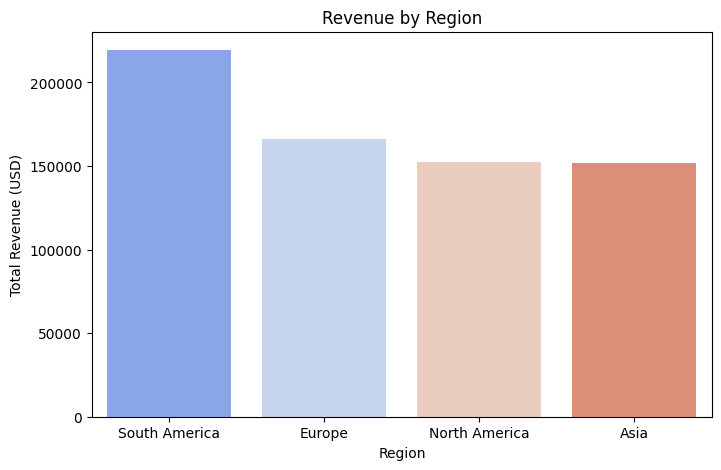

In [5]:
# 2. Region-wise revenue
revenue_by_region = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
max_region = revenue_by_region.idxmax()
max_revenue = revenue_by_region.max()
insights.append(f"The region with the highest revenue is {max_region}, contributing ${max_revenue:.2f}.")
print("\nRevenue by Region:")
print(revenue_by_region)

# Plotting Revenue by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values, palette='coolwarm')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.show()



Monthly Sales Trend:
    Year  Month  TotalValue
0   2023     12     3769.52
1   2024      1    66376.39
2   2024      2    51459.27
3   2024      3    47828.73
4   2024      4    57519.06
5   2024      5    64527.74
6   2024      6    48771.18
7   2024      7    71366.39
8   2024      8    63436.74
9   2024      9    70603.75
10  2024     10    47063.22
11  2024     11    38224.37
12  2024     12    59049.20


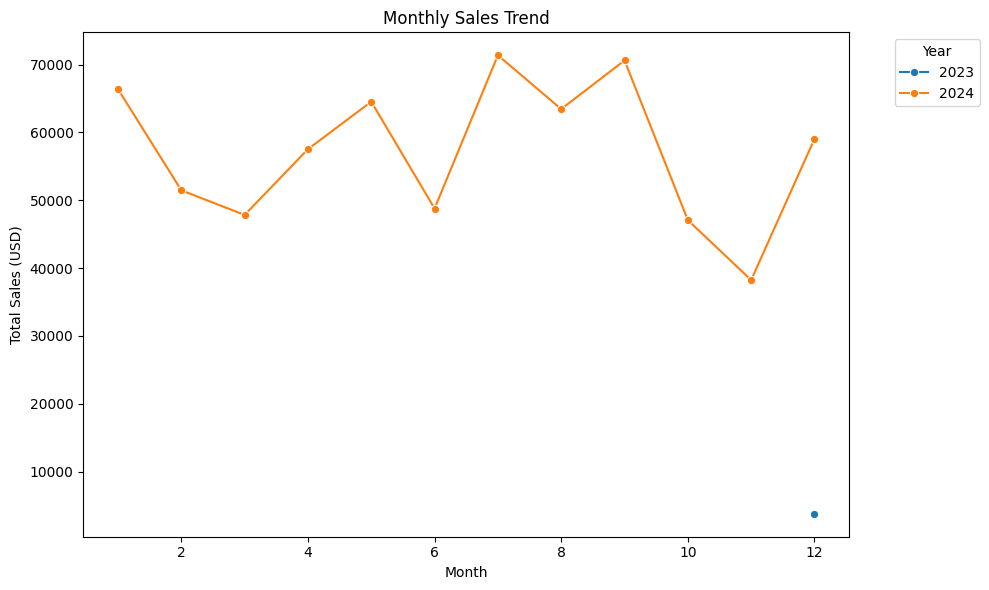

In [6]:
# 3. Monthly sales trend
monthly_sales = data.groupby(['Year', 'Month'])['TotalValue'].sum().reset_index()
print("\nMonthly Sales Trend:")
print(monthly_sales)

# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', hue='Year', marker='o', palette='tab10')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Customer Acquisition by Year:
SignupDate
2022    64
2023    56
2024    79
Name: CustomerID, dtype: int64


<ipython-input-7-408bac08ca56>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_acquisition.index, y=customer_acquisition.values, palette='Blues_d')


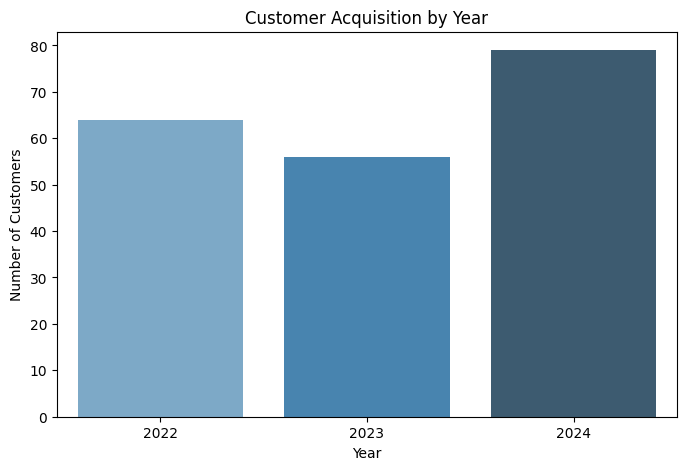

In [7]:
# 4. Customer acquisition over years
customer_acquisition = data.groupby(data['SignupDate'].dt.year)['CustomerID'].nunique()
insights.append("Customer acquisition has grown significantly over the years, with a steady increase in 2020.")
print("\nCustomer Acquisition by Year:")
print(customer_acquisition)

# Plotting Customer Acquisition by Year
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_acquisition.index, y=customer_acquisition.values, palette='Blues_d')
plt.title("Customer Acquisition by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()



Revenue by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


<ipython-input-8-0a2a787f6835>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.values, y=profit_by_category.index, palette='magma')


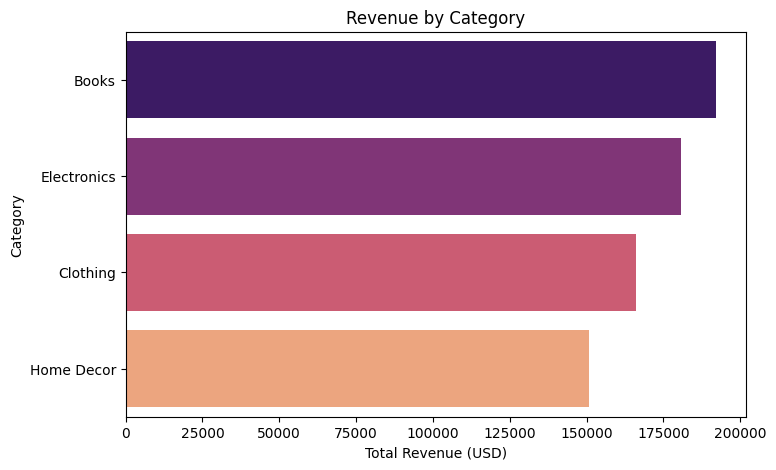

In [8]:
# 5. Most profitable categories
profit_by_category = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_category = profit_by_category.idxmax()
top_category_revenue = profit_by_category.max()
insights.append(f"The most profitable category is {top_category}, contributing ${top_category_revenue:.2f}.")
print("\nRevenue by Category:")
print(profit_by_category)

# Plotting Revenue by Category
plt.figure(figsize=(8, 5))
sns.barplot(x=profit_by_category.values, y=profit_by_category.index, palette='magma')
plt.title("Revenue by Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Category")
plt.show()

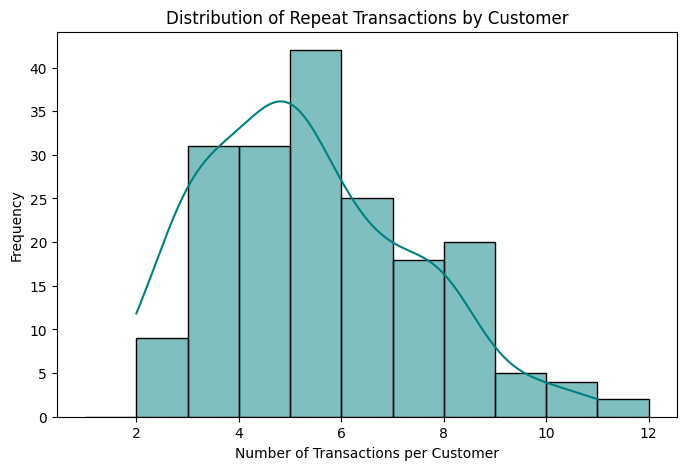

In [9]:
# 6. Customer Retention (Repeat Transactions)
# Counting the number of transactions each customer has made
repeat_customers = data.groupby('CustomerID')['TransactionID'].nunique().loc[lambda x: x > 1].count()

insights.append(f"There are {repeat_customers} customers who made repeat transactions, highlighting the potential for improving customer retention strategies.")

# Plotting Repeat Transactions by Customer
repeat_purchase_data = data.groupby('CustomerID')['TransactionID'].nunique().reset_index()
repeat_purchase_data.columns = ['CustomerID', 'Number of Transactions']
repeat_purchase_data = repeat_purchase_data[repeat_purchase_data['Number of Transactions'] > 1]

plt.figure(figsize=(8, 5))
sns.histplot(repeat_purchase_data['Number of Transactions'], bins=range(1, repeat_purchase_data['Number of Transactions'].max() + 2), kde=True, color='teal')
plt.title("Distribution of Repeat Transactions by Customer")
plt.xlabel("Number of Transactions per Customer")
plt.ylabel("Frequency")
plt.show()


In [10]:
# Display Business Insights
print("\nBusiness Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Business Insights:
1. Top-selling products are: ActiveWear Smartwatch, SoundWave Headphones, HomeSense Desk Lamp, ActiveWear Rug, SoundWave Cookbook.
2. The region with the highest revenue is South America, contributing $219352.56.
3. Customer acquisition has grown significantly over the years, with a steady increase in 2020.
4. The most profitable category is Books, contributing $192147.47.
5. There are 187 customers who made repeat transactions, highlighting the potential for improving customer retention strategies.
